In [1]:
import os, sys, math
import glob
import cv2
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# %matplotlib notebook

In [2]:
# import plotly.express as px
# Custom modules
sys.path.append('../../NanoscoPy/')
from nanoscopy import spm
from nanoscopy.utilities import dialog_askfilename, dialog_askdirectory 
from nanoscopy import factorial_doe

In [8]:
path = dialog_askdirectory()

In [9]:
paths = glob.glob(os.path.join(path, f"*.csv"))
paths

['C:/Users/lab_cos_ishigami/Downloads/Defect Profiles/SBT\\SBT_UCF.csv']

In [10]:
dfs = [pd.read_csv(path, names=["X (nm)", "Z (nm)"]) for path in paths]


In [48]:
df = dfs[0]
n = len(df['Z (nm)'])
z_mean = df['Z (nm)'].mean()
df['Squared Deviation from Mean (nm)'] = (df['Z (nm)'] - z_mean)**2
variance = sum(df['Squared Deviation from Mean (nm)'])/n
variance

0.03226449731918727

In [32]:
max_devi = df['Squared Deviation from Mean (nm)'].max()
threshhold_mask = (df['Squared Deviation from Mean (nm)'] / max_devi) > 0.2
sel = df[threshhold_mask]
xmin = sel['X (nm)'].min()
xmax = sel['X (nm)'].max()
width = xmax-xmin

In [49]:
threshhold_mask = df['Squared Deviation from Mean (nm)'] > variance
sel = df[threshhold_mask]
xmin = sel['X (nm)'].min()
xmax = sel['X (nm)'].max()
width = xmax-xmin

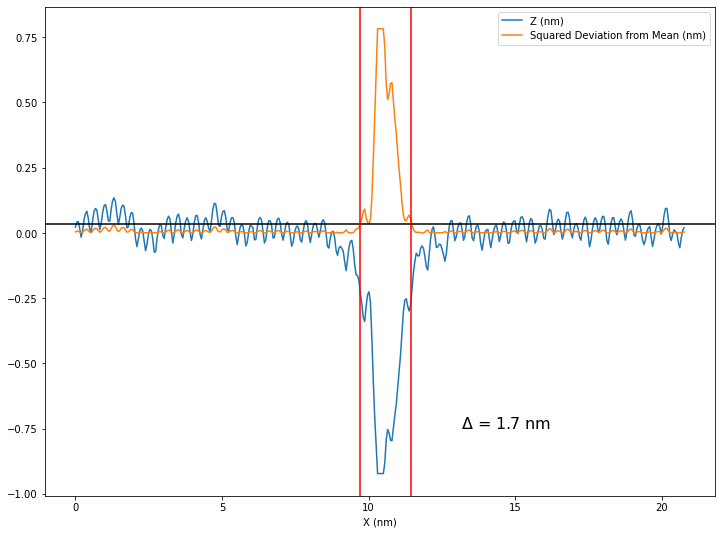

In [53]:
ax = df.plot(x="X (nm)", y=["Z (nm)", "Squared Deviation from Mean (nm)"], figsize=(12,9))
ax.axhline(y=variance, color = 'black')
ax.axvline(x = xmin, ymin = 0, ymax = 1, color = 'r',
            label = 'axvline - % of full height')
ax.axvline(x = xmax, ymin = 0, ymax = 1, color = 'r',
            label = 'axvline - % of full height')       
ax.annotate(f'$\Delta$ = {width:.2} nm', xy=(xmax+width, -0.75),size = 16)
plt.show()

In [85]:
def extact_dim(path):
    paths = glob.glob(os.path.join(path, f"*.csv"))
    dfs = [pd.read_csv(path, names=["X (nm)", "Z (nm)"]) for path in paths]
    df = dfs[0]
    for df in dfs:
        n = len(df['Z (nm)'])
        z_mean = df['Z (nm)'].mean()
        df['Squared Deviation from Mean (nm)'] = (df['Z (nm)'] - z_mean)**2
        variance = sum(df['Squared Deviation from Mean (nm)'])/n
        threshold = (variance * 2.5)
        threshhold_mask = df['Squared Deviation from Mean (nm)'] > threshold
        sel = df[threshhold_mask]
        xmin = sel['X (nm)'].min()
        xmax = sel['X (nm)'].max()
        width = xmax-xmin
        ax = df.plot(x="X (nm)", y=["Z (nm)", "Squared Deviation from Mean (nm)"], figsize=(12,9))
        ax.axhline(y=threshold, color = 'black')
        ax.axvline(x = xmin, ymin = 0, ymax = 1, color = 'r',
                    label = 'axvline - % of full height')
        ax.axvline(x = xmax, ymin = 0, ymax = 1, color = 'r',
                    label = 'axvline - % of full height')       
        ax.annotate(f'$\Delta$ = {width:.2} nm', xy=(xmax+width, -0.75),size = 16)

    plt.show()

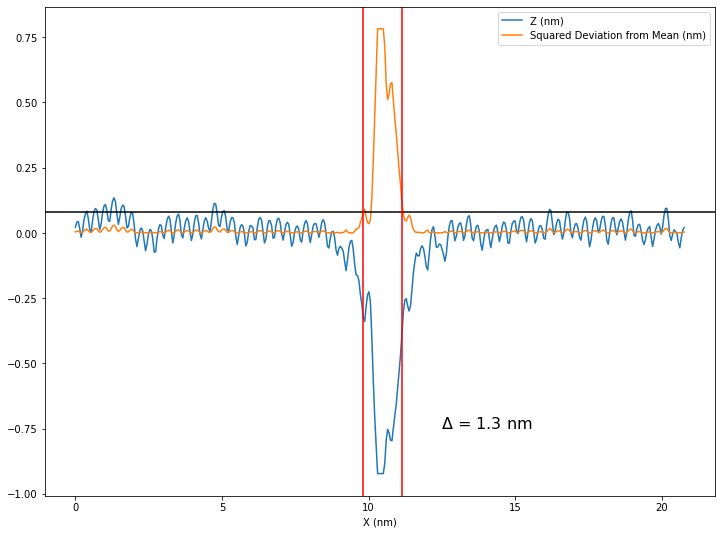

In [87]:
path = dialog_askdirectory()
extact_dim(path)